# Linear Regression

### Imports

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Functions

In [68]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [69]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

### Sample Data

In [106]:
X1 = pd.DataFrame({'a':[1,1,1,1,1,1],'b':[1,2,3,4,6,8]})
y1 = pd.DataFrame([1,2,3,5,5,9])
X = X1.iloc[:,0:X1.shape[1]]
y = y1.iloc[:,0:y1.shape[1]]

### Model

#### Initializing variables

In [107]:
# initialize variables for learning rate and iterations
X = np.matrix(X.values)  
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
alpha = 0.01  
iters = 100

#### Fitting Linear Regression

In [128]:
# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
print('Intercept: %.5f'%g.item(0))
print('Slope: %.5f'%g.item(1))

Intercept: 0.13123
Slope: 1.02149


#### Plot

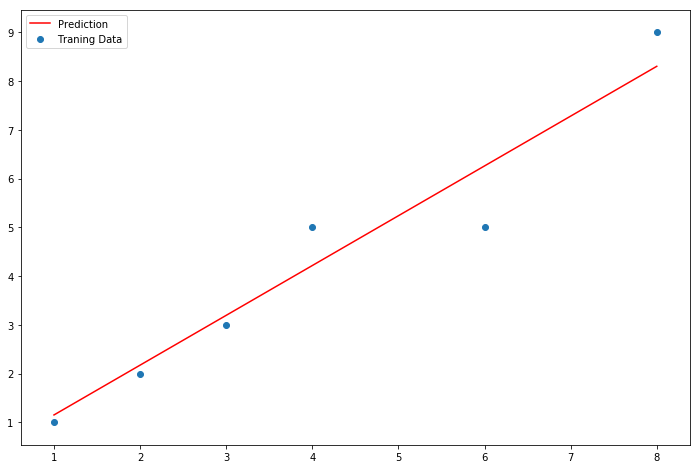

In [115]:
fig, ax = plt.subplots(figsize=(12,8))  
x = np.linspace(X1['b'].min(), X1['b'].max(), 100)  
f = g[0, 0] + (g[0, 1] * x)
ax.plot(x, f, 'r', label='Prediction')  

ax.scatter(X1['b'], y1, label='Traning Data')  
ax.legend(loc=2)  
plt.show()